<a href="https://colab.research.google.com/github/JoshuaHaga/covid_tracking_project/blob/master/Harrisonburg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions

In [42]:
###Must run for visualizations
!pip install plotly==4.9.0

In [43]:
#Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly as plt

In [44]:
!pip install sodapy

In [103]:
###Data import API
from sodapy import Socrata
client = Socrata("data.virginia.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.virginia.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
va_cases = client.get("bre9-aqqr", limit=500000)
va_cases_zip = client.get("8bkr-zfqv", limit=500000)

# Convert to pandas DataFrame
va_locality_cases = pd.DataFrame.from_records(va_cases)
va_cases_zip = pd.DataFrame.from_records(va_cases_zip)

In [46]:
#Dependencies for chloropleth
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [47]:
#Chart studio is required in order to embed the charts
!pip install chart_studio

In [48]:
#Plotly embed dependencies. API crednetials can be replaced by your own with a free account. 
import plotly
import chart_studio
import chart_studio.plotly as py
username = 'josh.haga' # your username
api_key = '6bgoxTaL6JLm9a9DquYX' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [49]:
###Datasets
###va_locality_cases = pd.read_csv('https://raw.githubusercontent.com/JoshuaHaga/covid_tracking_project/master/VDH-COVID-19-PublicUseDataset-Cases.csv')
###va_cases_zip      = pd.read_csv('https://raw.githubusercontent.com/JoshuaHaga/covid_tracking_project/master/VDH-COVID-19-PublicUseDataset-ZIPCode.csv')

#Exploration

In [104]:
va_cases_zip.head()

,report_date,zip_code,number_of_cases,number_of_pcr_testing,number_of_testing_encounters
0,2020-09-09T00:00:00.000,20105,223,4298,NaN
1,2020-09-09T00:00:00.000,20106,69,548,NaN
2,2020-09-09T00:00:00.000,20109,1592,8936,NaN
3,2020-09-09T00:00:00.000,20110,1991,11347,NaN
4,2020-09-09T00:00:00.000,20111,1314,7518,NaN


In [105]:
###Filter for just harrisonburg
harrison_zip = [22801,22802,22803,22807]
harrison_cases = va_cases_zip[va_cases_zip['zip_code'].isin(['22801','22802','22803','22807'])]
#harrison_cases

###va_locality_cases

In [106]:
###Convert to datetime
va_locality_cases['report_date'] = pd.to_datetime(va_locality_cases['report_date'])

In [107]:
va_locality_cases['report_date'] = va_locality_cases['report_date'].dt.date

In [108]:
va_locality_cases['report_date'] = va_locality_cases['report_date'].astype(str)

In [120]:
va_locality_cases = va_locality_cases.sort_values(['report_date'], ascending=True)

In [121]:
va_locality_cases

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths
23540,2020-03-17,51840,Winchester,Lord Fairfax,0,0,0
23442,2020-03-17,51071,Giles,New River,0,0,0
23443,2020-03-17,51073,Gloucester,Three Rivers,0,0,0
23444,2020-03-17,51075,Goochland,Chickahominy,1,0,0
23445,2020-03-17,51077,Grayson,Mount Rogers,0,0,0
...,...,...,...,...,...,...,...
95,2020-09-09,51510,Alexandria,Alexandria,3546,302,62
96,2020-09-09,51520,Bristol,Mount Rogers,149,8,2
97,2020-09-09,51530,Buena Vista City,Central Shenandoah,77,4,1
83,2020-09-09,51175,Southampton,Western Tidewater,385,16,13


In [110]:
#va_comb = pd.merge(va_locality_cases,va_cases_zip, on=)

In [122]:
va_locality_cases['report_date'].describe()

count          23541
unique           177
top       2020-04-22
freq             133
Name: report_date, dtype: object

In [123]:
current_cases = va_locality_cases[va_locality_cases['report_date'] == va_locality_cases['report_date'].max()]

In [113]:
va_county_cases_fig = px.choropleth(va_locality_cases, geojson=counties, locations='fips', color='total_cases',
 color_continuous_scale='portland',
 range_color=(va_locality_cases['total_cases'].min(), va_locality_cases['total_cases'].mean()*4),
 scope='usa',
 labels={'color':'Current Covid Cases',
         'locality':'County',
         }
 )
va_county_cases_fig.update_geos(fitbounds="locations", visible=False)
va_county_cases_fig.update_layout(
    title_text = 'Positive Results by County in VA'
)
va_county_cases_fig.show()
#va_county_cases_fig.write_html('/content/full_map.html')

TypeError: ignored

In [124]:
def rolling_seven_avg(df,locality,feature,days):
  df = df[df['locality']==locality]
  df['new_cases'] = df[feature].astype(int).diff()
  rolling_avg = df['new_cases'].rolling(window=days).mean()
  df['rolling_avg'] = rolling_avg
  return df
 

In [125]:
def col_list(dataframe):
  val_counts = dataframe.value_counts()
  val_as_pd  = pd.DataFrame(val_counts).T
  val_list   = val_as_pd.columns.tolist()
  return val_list

In [126]:
harrison = rolling_seven_avg(va_locality_cases,'Harrisonburg','total_cases',7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
harrison

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths,new_cases,rolling_avg
23518,2020-03-17,51660,Harrisonburg,Central Shenandoah,1,1,0,NaN,NaN
23385,2020-03-18,51660,Harrisonburg,Central Shenandoah,1,1,0,0.0,NaN
23252,2020-03-19,51660,Harrisonburg,Central Shenandoah,1,1,0,0.0,NaN
23119,2020-03-20,51660,Harrisonburg,Central Shenandoah,1,0,0,0.0,NaN
22986,2020-03-21,51660,Harrisonburg,Central Shenandoah,1,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
642,2020-09-05,51660,Harrisonburg,Central Shenandoah,1665,87,33,78.0,60.714286
509,2020-09-06,51660,Harrisonburg,Central Shenandoah,1735,87,33,70.0,64.285714
376,2020-09-07,51660,Harrisonburg,Central Shenandoah,1793,88,33,58.0,63.857143
243,2020-09-08,51660,Harrisonburg,Central Shenandoah,1936,88,33,143.0,73.285714


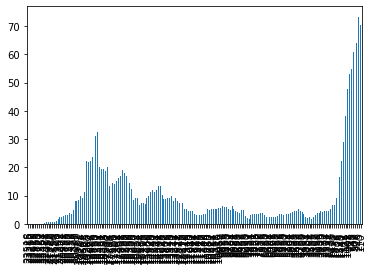

In [128]:
harrison['rolling_avg'].plot(kind='bar',)

In [130]:
harrison.head()

,report_date,fips,locality,vdh_health_district,total_cases,hospitalizations,deaths,new_cases,rolling_avg
23518,2020-03-17,51660,Harrisonburg,Central Shenandoah,1,1,0,NaN,NaN
23385,2020-03-18,51660,Harrisonburg,Central Shenandoah,1,1,0,0.0,NaN
23252,2020-03-19,51660,Harrisonburg,Central Shenandoah,1,1,0,0.0,NaN
23119,2020-03-20,51660,Harrisonburg,Central Shenandoah,1,0,0,0.0,NaN
22986,2020-03-21,51660,Harrisonburg,Central Shenandoah,1,0,0,0.0,NaN


In [ ]:
harrisonburg_sevenday_rolling = px.bar(harrison, x='report_date', y='rolling_avg',
                                       labels={'rolling_avg':'Number of Positive Cases', 
                                      'report_date':'Date',})
harrisonburg_sevenday_rolling.show()

In [ ]:
py.plot(harrisonburg_sevenday_rolling, filename = 'harrisonburg_sevenday_rolling', auto_open=True)

In [135]:
fig = px.bar(harrison, x='report_date', y='rolling_avg')
fig.show()

ValueError: ignored

In [ ]:
augusta = rolling_seven_avg(va_locality_cases,'Augusta','total_cases',7)

In [ ]:
augusta_sevenday_rolling = px.bar(augusta, x='Report Date', y='rolling_avg',
                                  labels={'rolling_avg':'Number of Positive Cases', 
                                      'Report Date':'Date',
                                      })
#augusta_sevenday_rolling.show()

# Visualizations

###Harrisonburg 7 day Rolling Avg

In [ ]:
harrisonburg_sevenday_rolling.show()

In [ ]:
####Link to embed Harrisonburg 7 day Rolling Avg
py.plot(harrisonburg_sevenday_rolling, filename = 'harrisonburg_sevenday_rolling', auto_open=True)

###VA Cases by county 

In [ ]:
va_county_cases_fig.show()

In [ ]:
#py.plot(va_county_cases_fig, filename = 'va_county_cases_fig', auto_open=True)